# Exploratory Data Analysis

## The data

Attributes are as follows:
- **Cq**
- **Baseline** 
- **Plateau** 
- **Slope**
- **Inflection** 
- **Asymmetry** 
- **Drift**

- **CurveCall**:
    1. If True, this curve represents a mutation
    2. If False, it does not

In [1]:
import pandas as pd, numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [2]:
# Data for training
train_dat = pd.read_csv('../datasets/Trainingset.csv')
train_dat.columns.values[0] = 'id'

# Data for final validation 
final_val_dat = pd.read_csv('../datasets/Validationset.csv')
final_val_dat.columns.values[0] = 'id'

print(train_dat.shape)
train_dat.head()

(1000, 9)


,id,cq,baseline,plateau,slope,inflection,asymmetry,drift,CurveCall
0,53369,39.381426,18.862292,35.527769,-0.447984,35.357707,5.5,0.036513,True
1,182009,26.649803,23.902034,25.035602,-0.138960,13.677998,5.5,0.026517,False
2,95707,38.088840,19.150485,37.676668,-0.429194,33.888961,5.5,0.043123,True
3,449346,38.118073,17.925782,37.875329,-0.412705,33.750390,5.5,-0.017076,True
4,292414,38.412099,16.631370,30.774217,-0.442670,34.340077,5.5,-0.002722,True


In [3]:
train_dat = train_dat.drop(['id'], axis=1) #drop id column
print('Some information: ')
train_dat.info()

Some information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cq          819 non-null    float64
 1   baseline    1000 non-null   float64
 2   plateau     1000 non-null   float64
 3   slope       1000 non-null   float64
 4   inflection  1000 non-null   float64
 5   asymmetry   1000 non-null   float64
 6   drift       1000 non-null   float64
 7   CurveCall   1000 non-null   bool   
dtypes: bool(1), float64(7)
memory usage: 55.8 KB


## Descriptive Statistics

In [4]:
# Descriptive statistics for training dataset
train_dat.describe()
# There is 181 missing values for cq

,cq,baseline,plateau,slope,inflection,asymmetry,drift
count,819.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.143438,18.393905,38.119705,-0.456405,34.684044,4.364607,0.037798
std,9.895221,5.055759,46.755192,0.360630,13.699149,1.875227,0.050050
min,0.509646,-74.319376,11.268420,-4.564430,0.000000,0.500000,-0.355829
25%,37.841447,16.261901,23.445959,-0.471023,33.747544,3.224358,0.019646
50%,38.721260,18.518176,33.919381,-0.427451,34.728658,5.500000,0.035941
75%,40.812796,21.003851,40.241479,-0.317529,44.688536,5.500000,0.060591
max,49.982774,29.108979,741.077662,-0.010000,60.000000,5.500000,0.244130


In [5]:
# Also take a quick peek at validation dataset 
final_val_dat.describe()
#There is 19 missing values for cq

,id,cq,baseline,plateau,slope,inflection,asymmetry,drift
count,100.000000,81.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,170142.810000,35.138986,17.014693,35.391620,-0.394418,33.062549,4.468564,0.019686
std,124197.127935,10.607210,13.650506,18.970570,0.313773,13.765374,1.843884,0.148660
min,14726.000000,0.179633,-78.751009,13.363196,-2.093398,0.000000,0.500000,-1.262055
25%,54623.750000,29.817991,16.228601,25.297808,-0.443685,33.587708,4.759102,0.019364
50%,152962.500000,38.714564,18.893077,33.899841,-0.413892,34.969222,5.500000,0.040164
75%,249393.500000,39.954322,21.472365,39.463385,-0.219955,41.028549,5.500000,0.062305
max,455376.000000,49.790245,30.119468,166.269239,-0.010000,60.000000,5.500000,0.125165


In [6]:
# Descriptive statistics for CurveCall = True, curves which represent mutants
true_dat= train_dat[train_dat['CurveCall']==True]
true_dat.describe()

,cq,baseline,plateau,slope,inflection,asymmetry,drift
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,38.820460,18.810557,39.047956,-0.431710,34.652361,5.470167,0.048905
std,1.039227,3.339102,6.232567,0.030294,1.284081,0.313649,0.036747
min,36.581991,10.611930,22.377895,-0.672486,32.216846,1.503091,-0.031223
25%,38.167306,16.535749,34.865263,-0.447661,33.970237,5.500000,0.024429
50%,38.661613,18.582049,38.171839,-0.430654,34.455170,5.500000,0.042453
75%,39.242368,21.197919,42.976283,-0.413598,34.983025,5.500000,0.067295
max,47.082603,29.108979,58.291549,-0.313121,47.345882,5.500000,0.244130


In [7]:
# Descriptive statistics for CurveCall = False, curves which represent non-mutant
false_dat= train_dat[train_dat['CurveCall']==False]
false_dat.describe()

,cq,baseline,plateau,slope,inflection,asymmetry,drift
count,358.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,34.983920,18.037548,37.325784,-0.477527,34.711142,3.419035,0.028297
std,14.651119,6.136284,63.440051,0.489632,18.629616,2.121899,0.057453
min,0.509646,-74.319376,11.268420,-4.564430,0.000000,0.500000,-0.355829
25%,20.963144,16.032978,19.517874,-0.653941,17.541846,1.096238,0.014623
50%,45.285898,18.434433,24.504577,-0.373029,42.981315,3.924271,0.031494
75%,48.065715,20.787681,32.923507,-0.125887,47.541668,5.500000,0.053034
max,49.982774,28.550689,741.077662,-0.010000,60.000000,5.500000,0.167812


In [8]:
# Descriptive statistics for training data which have cq missing 
null_dat = train_dat[train_dat['cq'].isnull()]
null_dat.describe()

,cq,baseline,plateau,slope,inflection,asymmetry,drift
count,0.0,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,NaN,17.088710,59.807427,-0.427719,39.157395,3.004313,0.014138
std,NaN,9.312375,105.374545,0.514145,19.652664,2.202001,0.072925
min,NaN,-74.319376,12.709272,-1.924968,0.000000,0.500000,-0.355829
25%,NaN,15.983979,19.728490,-0.622352,33.226878,0.500000,0.008929
50%,NaN,18.213682,24.938338,-0.157767,46.586794,3.094745,0.024865
75%,NaN,20.310902,44.759090,-0.023033,54.774169,5.500000,0.046935
max,NaN,26.486941,741.077662,-0.010000,60.000000,5.500000,0.125966


In [9]:
# Descriptive statistics for training data with no missing values
notnull_dat = train_dat[train_dat['cq'].notnull()]
notnull_dat.describe()

,cq,baseline,plateau,slope,inflection,asymmetry,drift
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,37.143438,18.682355,33.326692,-0.462745,33.695428,4.665233,0.043027
std,9.895221,3.416663,9.965060,0.316922,11.781201,1.651566,0.041688
min,0.509646,9.694156,11.268420,-4.564430,0.000000,0.500000,-0.277589
25%,37.841447,16.328812,25.338880,-0.466509,33.774451,5.500000,0.022779
50%,38.721260,18.574490,34.717038,-0.430051,34.591830,5.500000,0.038355
75%,40.812796,21.128774,40.026132,-0.393576,39.486929,5.500000,0.062826
max,49.982774,29.108979,87.612062,-0.010000,60.000000,5.500000,0.244130


In [10]:
# Descriptive statistics for training data with no missing values and are CurveCall False
false_notnull_dat= notnull_dat[notnull_dat['CurveCall']==False]
false_notnull_dat.describe()

,cq,baseline,plateau,slope,inflection,asymmetry,drift
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,34.983920,18.517268,25.959367,-0.502709,32.463176,3.628712,0.035456
std,14.651119,3.511823,8.987939,0.475511,17.697383,2.051620,0.046260
min,0.509646,9.694156,11.268420,-4.564430,0.000000,0.500000,-0.277589
25%,20.963144,16.111976,19.451242,-0.666738,14.252715,1.579265,0.020053
50%,45.285898,18.520175,23.865637,-0.415472,42.359272,4.783186,0.033702
75%,48.065715,21.073467,30.754644,-0.160686,46.947577,5.500000,0.056630
max,49.982774,28.550689,87.612062,-0.010000,60.000000,5.500000,0.167812


In [11]:
train_dat['CurveCall'].value_counts(normalize=True) 
# Training data is relatively balanced

False    0.539
True     0.461
Name: CurveCall, dtype: float64

## Exploratory analysis

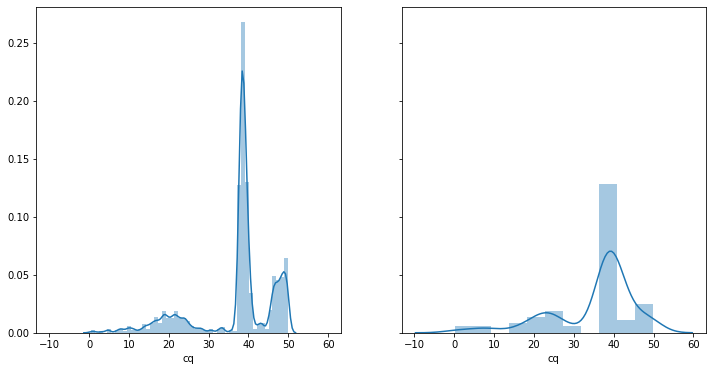

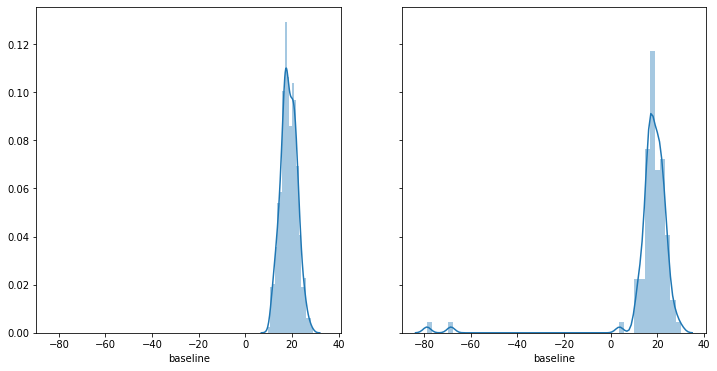

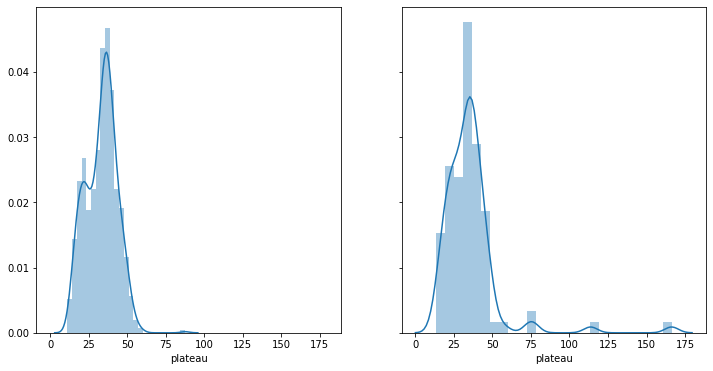

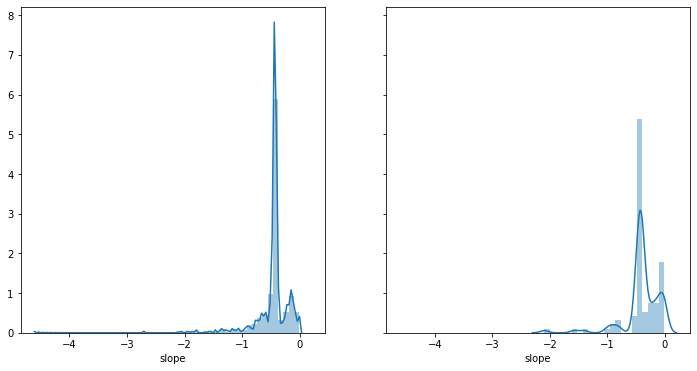

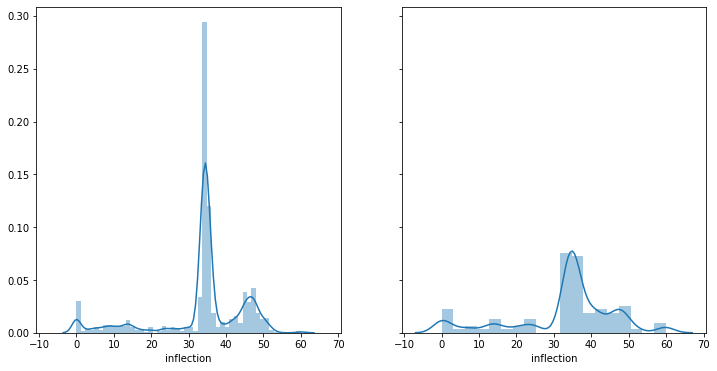

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

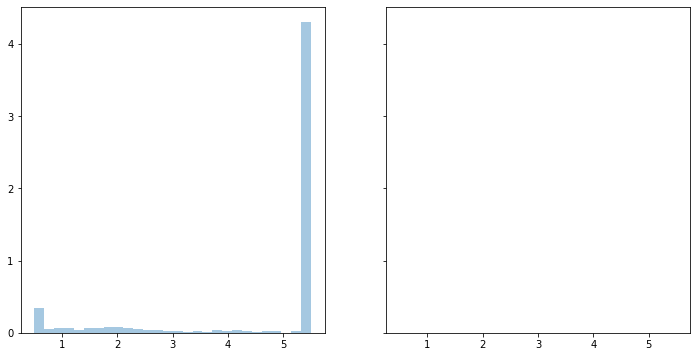

In [12]:
# Look at variables distributions
for i in range (0,7):
    fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2, sharex=True, sharey=True)
    sns.distplot(notnull_dat.iloc[:,i],ax=ax1)
    sns.distplot(final_val_dat.iloc[:,i+1],ax=ax2)
    plt.show()
# Most variation seen in cq, slope, inflection, asymmetry 
# Training and validation set have similar variable distribution, 
# cq values in validation set less concentrated around 40 (due to sample size?)

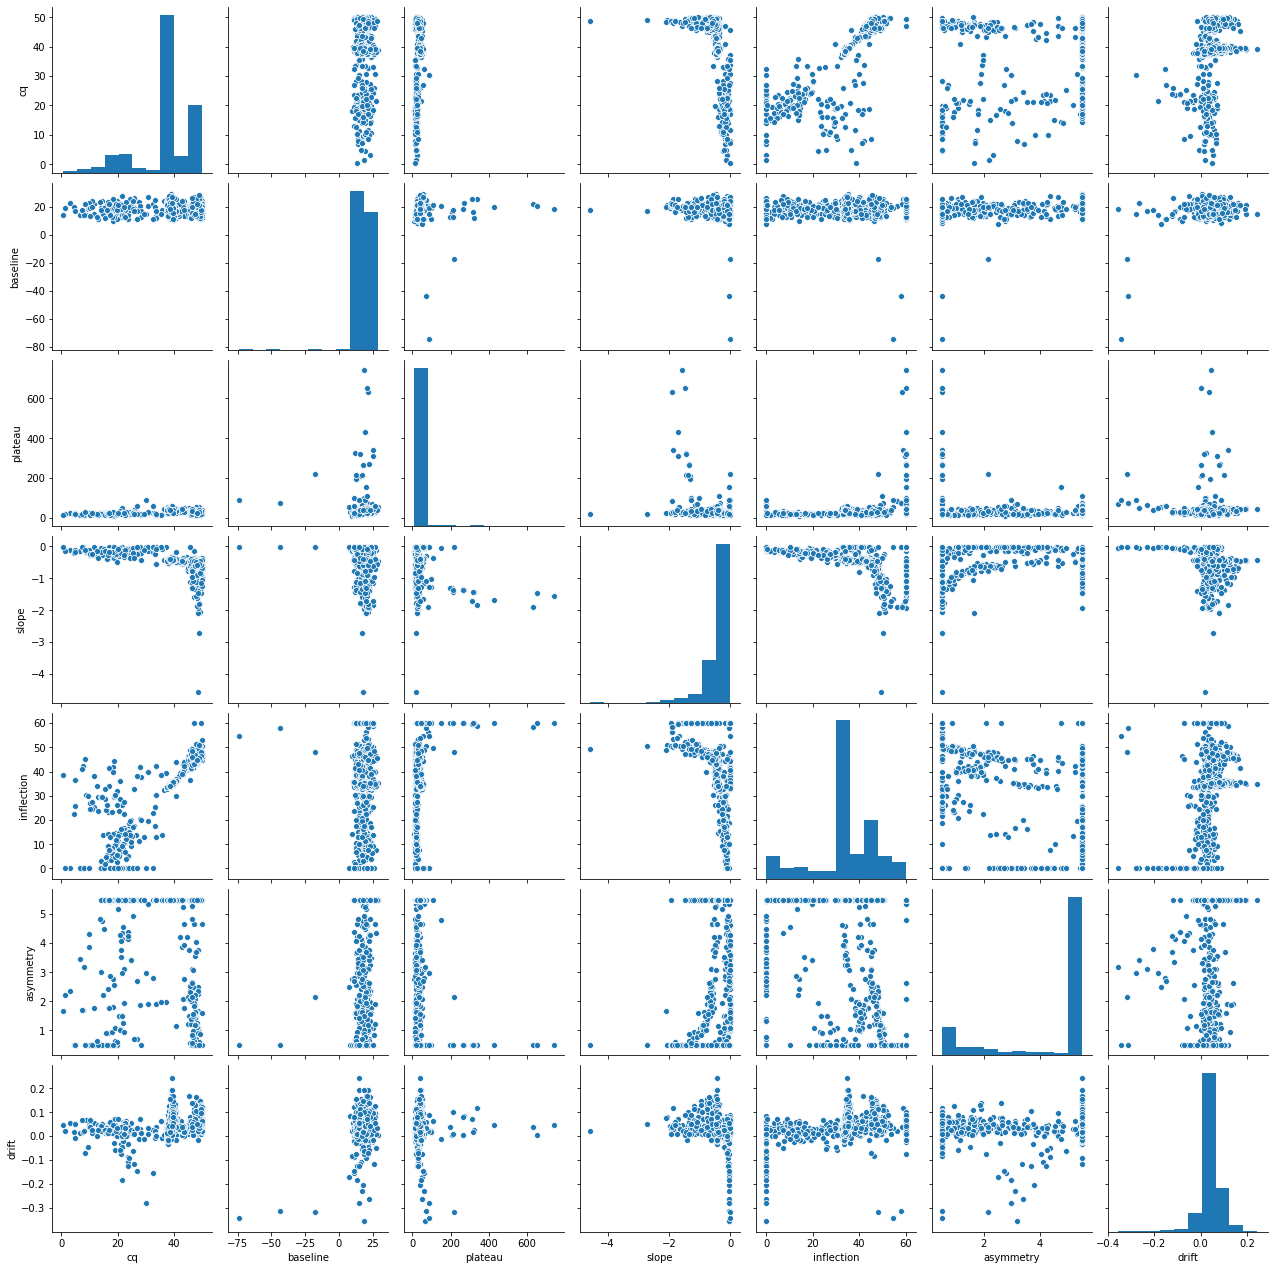

In [13]:
quant_dat = train_dat.drop('CurveCall', axis=1)  
sns.pairplot(quant_dat)
plt.show()

,cq,baseline,plateau,slope,inflection,asymmetry,drift,CurveCall
cq,1.000000,0.040549,0.365666,-0.585485,0.813833,0.155839,0.304864,0.192437
baseline,0.040549,1.000000,0.020899,-0.088765,0.010716,0.115026,0.348870,0.076254
plateau,0.365666,0.020899,1.000000,-0.339884,0.261553,-0.167310,-0.027877,0.018370
slope,-0.585485,-0.088765,-0.339884,1.000000,-0.585584,0.267649,-0.202412,0.063362
inflection,0.813833,0.010716,0.261553,-0.585584,1.000000,-0.200378,0.281971,-0.002140
asymmetry,0.155839,0.115026,-0.167310,0.267649,-0.200378,1.000000,0.172245,0.545509
drift,0.304864,0.348870,-0.027877,-0.202412,0.281971,0.172245,1.000000,0.205348
CurveCall,0.192437,0.076254,0.018370,0.063362,-0.002140,0.545509,0.205348,1.000000


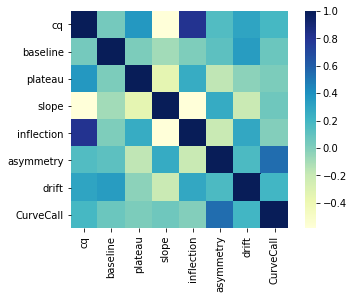

In [14]:
sns.heatmap(train_dat.corr(), square=True, cmap="YlGnBu")
train_dat.corr()
# Correlation between cq and inflection at 0.813833
# CurveCall is somewhat correlated to assymetry at 0.545509

,id,cq,baseline,plateau,slope,inflection,asymmetry,drift
id,1.000000,0.050732,-0.384204,0.203230,0.045501,-0.035316,-0.220622,-0.302245
cq,0.050732,1.000000,0.147966,0.593751,-0.683472,0.628176,0.395697,0.342276
baseline,-0.384204,0.147966,1.000000,-0.607095,-0.204367,-0.061125,0.350958,0.804129
plateau,0.203230,0.593751,-0.607095,1.000000,0.045002,0.120327,-0.017265,-0.772233
slope,0.045501,-0.683472,-0.204367,0.045002,1.000000,-0.502700,-0.041504,-0.191559
inflection,-0.035316,0.628176,-0.061125,0.120327,-0.502700,1.000000,-0.084758,0.037817
asymmetry,-0.220622,0.395697,0.350958,-0.017265,-0.041504,-0.084758,1.000000,0.331129
drift,-0.302245,0.342276,0.804129,-0.772233,-0.191559,0.037817,0.331129,1.000000


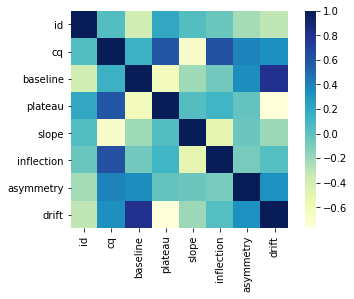

In [15]:
sns.heatmap(final_val_dat.corr(), square=True, cmap="YlGnBu")
final_val_dat.corr()
# In the validation set, there is correlation between cq and inflection (0.628176), 
# and cq and plateau (0.593751)
# Baseline is also strongly correlated to drift (0.804129)

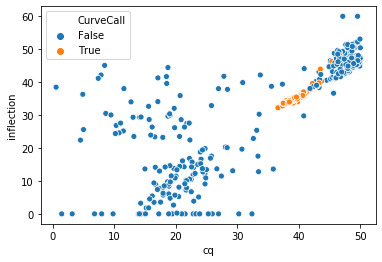

In [16]:
#Closer look at correlation in training data
sns.scatterplot(x="cq", y="inflection",hue="CurveCall", data=train_dat)
# Some relationship between cq and inflection 
plt.show()

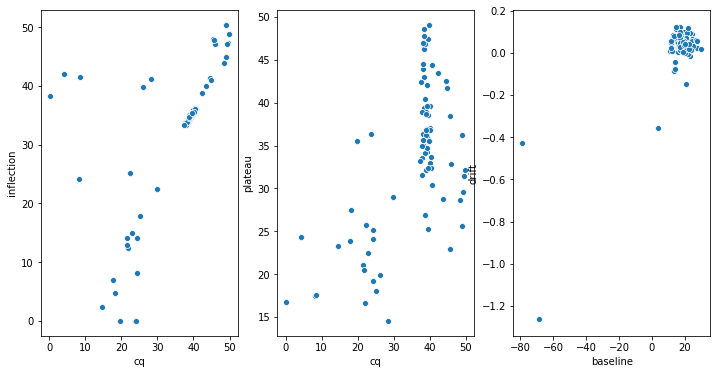

In [17]:
#Closer look at correlation in validation data
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 6), ncols=3, sharex=False, sharey=False)
sns.scatterplot(x="cq", y="inflection", data=final_val_dat, ax=ax1)
sns.scatterplot(x="cq", y="plateau", data=final_val_dat, ax=ax2)
sns.scatterplot(x="baseline", y="drift", data=final_val_dat, ax=ax3)
plt.show();

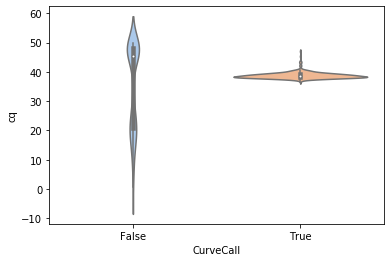

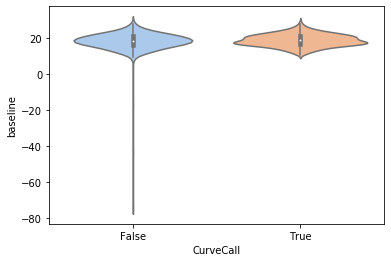

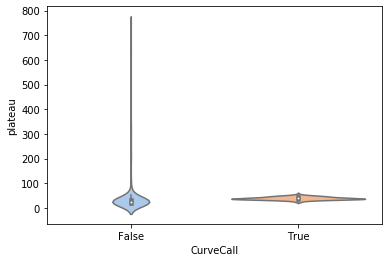

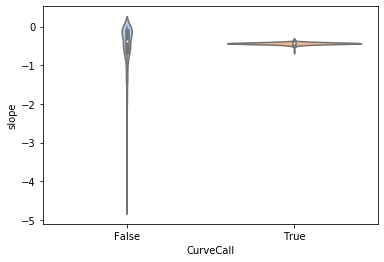

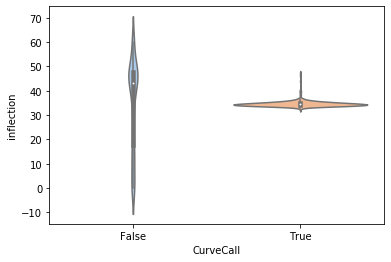

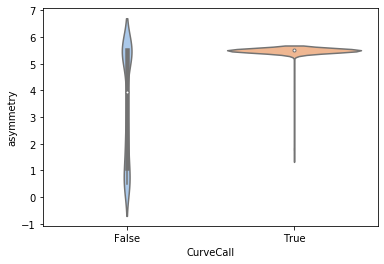

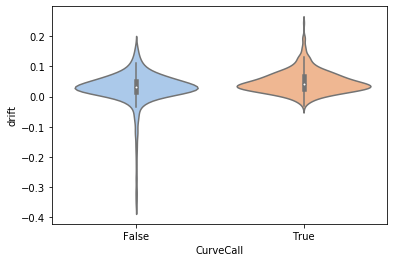

In [18]:
# Look at variables distributions
for i in range (0,7):
    plt.figure(i)
    sns.violinplot(x = "CurveCall", y = train_dat.iloc[:,i], data=train_dat, palette="pastel")
    
# Greatest variability in cq, slope, inflection, asymmetry between False and True 

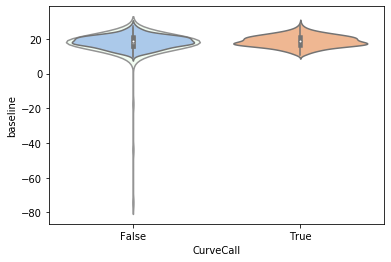

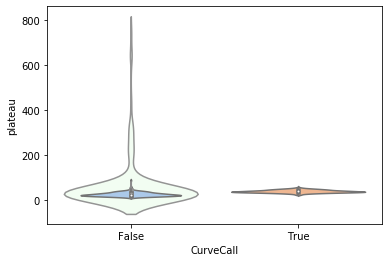

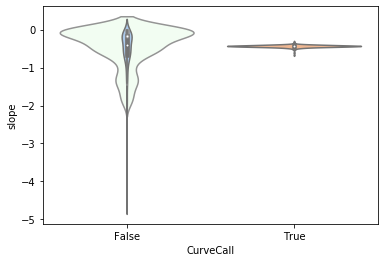

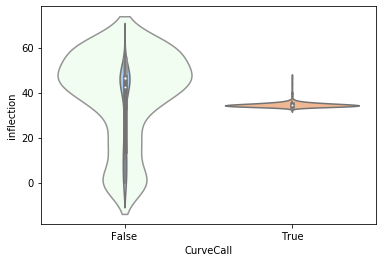

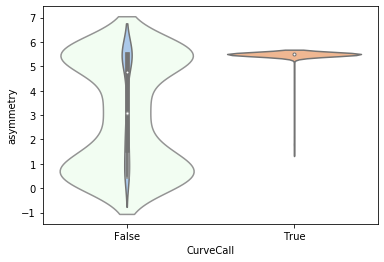

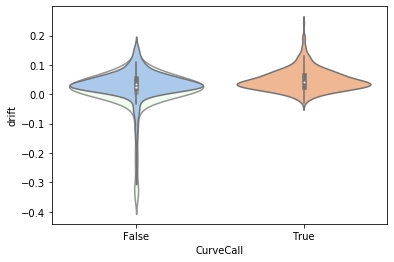

In [19]:
for i in range (1,7):
    plt.figure(i)
    sns.violinplot(x = "CurveCall", y = null_dat.iloc[:,i], data=null_dat, color="honeydew")
    sns.violinplot(x = "CurveCall", y = notnull_dat.iloc[:,i], data=notnull_dat, palette="pastel")

# Difference seen in slope, inflection, asymmetry, as well as plateau